In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from math import pi
import seaborn as sns

#import warnings
#warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./../../data/cleaned_data.csv", skipinitialspace=True, sep=',')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174207 entries, 0 to 174206
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       174207 non-null  object 
 1   state                      174207 non-null  object 
 2   city_or_county             174207 non-null  object 
 3   address                    161854 non-null  object 
 4   latitude                   174207 non-null  float64
 5   longitude                  174207 non-null  float64
 6   congressional_district     171311 non-null  float64
 7   state_house_district       152161 non-null  float64
 8   state_senate_district      157207 non-null  float64
 9   participant_age1           140191 non-null  float64
 10  participant_age_group1     166276 non-null  object 
 11  participant_gender1        169655 non-null  object 
 12  min_age_participants       140204 non-null  float64
 13  avg_age_participants       14

In [3]:
# Drop rows with n_participants = 0
df.loc[df['n_participants'] == 0] = np.nan
df = df.dropna(subset=['n_participants'])

In [4]:
df['killed_ratio'] = df['n_killed']/df['n_participants'] 
df['injured_ratio'] = df['n_injured']/df['n_participants'] 
df['child_ratio'] = df['n_participants_child']/df['n_participants'] 
df['teen_ratio'] = df['n_participants_teen']/df['n_participants'] 
df['adult_ratio'] = df['n_participants_adult']/df['n_participants'] 
df['arrested_ratio'] = df['n_arrested']/df['n_participants'] 
df['unharmed_ratio'] = df['n_unharmed']/df['n_participants'] 
df['males_ratio'] = df['n_males']/df['n_participants'] 
df['females_ratio'] = df['n_females']/df['n_participants'] 

In [5]:
cols = ['latitude', 'longitude', 'congressional_district', 'state_house_district', 'state_senate_district', 'participant_age1', 'min_age_participants', 'avg_age_participants',
        'max_age_participants', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested',
        'n_unharmed', 'n_participants', 'povertyPercentage', 'candidatevotes', 'totalvotes', 'killed_ratio', 'injured_ratio', 'child_ratio', 'teen_ratio', 'adult_ratio', 
        'arrested_ratio', 'unharmed_ratio', 'males_ratio', 'females_ratio']
df = df[cols]
df = df.dropna()

In [6]:
corr_threshold = 0.9
print("Attributo A\t\tAttributo B\t\tCorr(A,B)")
for i in range(0, len(df.columns)):
    for j in range(i+1, len(df.columns)):
        corr = df[df.columns[i]].corr(df[df.columns[j]])
        if  corr > corr_threshold:
            print(df.columns[i] + "\t" + df.columns[j] + "\t" + '{:.3f}'.format(corr))

Attributo A		Attributo B		Corr(A,B)
participant_age1	avg_age_participants	0.942
participant_age1	max_age_participants	0.921
min_age_participants	avg_age_participants	0.949
avg_age_participants	max_age_participants	0.947


In [7]:
cols = ['participant_age1', 'min_age_participants', 'avg_age_participants', 'max_age_participants', 'candidatevotes', 'totalvotes']
df.drop(cols, axis=1, inplace=True)

In [8]:
minmax_scaler = MinMaxScaler()
norm_df = minmax_scaler.fit_transform(df.values)

## K-MEANS

C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

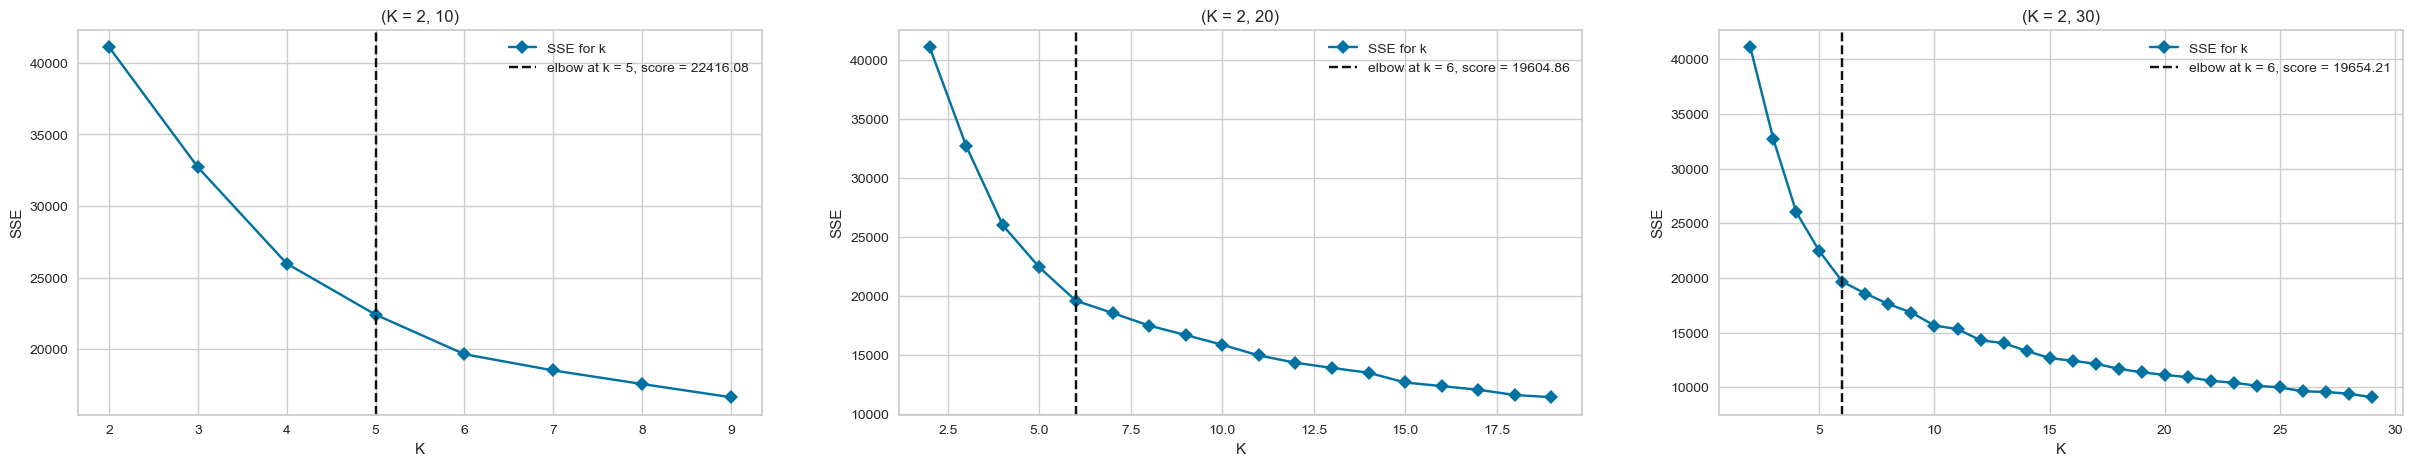

In [9]:
from yellowbrick.cluster import KElbowVisualizer

k_start = [2]
k_max = [10,20,30]
Ks = []
model = KMeans()

f, axs = plt.subplots(nrows=1, ncols=len(k_max), figsize=(30,5))

for i in range(len(k_max)):
    vis = KElbowVisualizer(model, k=(k_start[0],k_max[i]), metric='distortion', timings=False, ax=axs[i])
    vis.fit(norm_df)  
    axs[i].set_title('(K = ' + str(k_start[0]) + ', ' + str(k_max[i]) + ')' )
    axs[i].set_ylabel('SSE')
    axs[i].set_xlabel('K')
    axs[i].legend(['SSE for k','elbow at k = ' + str(vis.elbow_value_) + ', score = ' + '{:.2f}'.format(vis.elbow_score_)])
    if (vis.elbow_value_ not in Ks) and (vis.elbow_value_ != None):
        Ks.append(vis.elbow_value_)
plt.show()

Visualization of clusters centers by means of parallel coordinates

C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

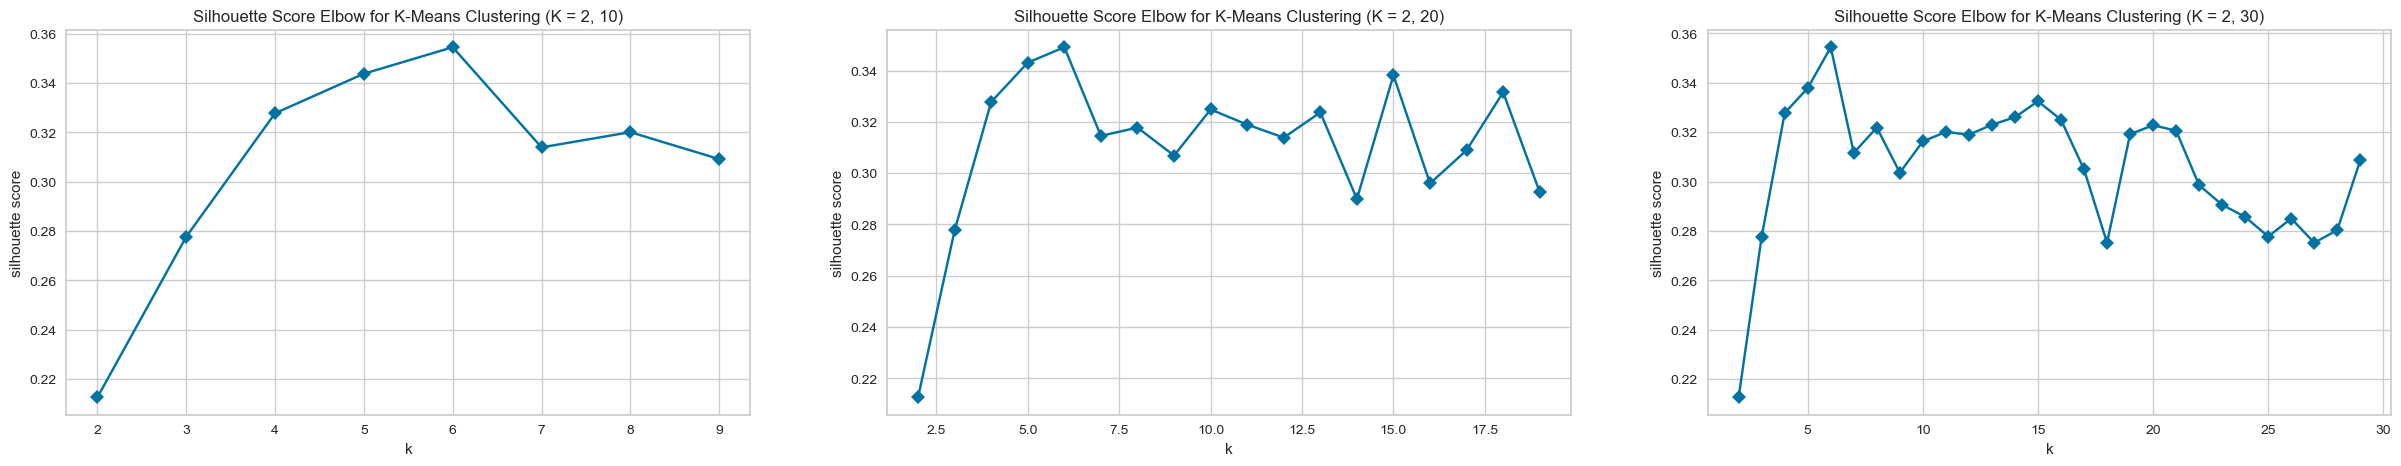

In [10]:
k_start = [2]
k_max = [10, 20, 30]
model = KMeans()

# print the elbow plots
f, axs = plt.subplots(nrows=1, ncols=len(k_max), figsize=(30,5))

for i in range(len(k_max)):
    vis = KElbowVisualizer(model, k=(k_start[0],k_max[i]), metric='silhouette', timings=False, ax=axs[i], locate_elbow=False)
    vis.fit(norm_df)  
    axs[i].set_title('Silhouette Score Elbow for K-Means Clustering (K = ' + str(k_start[0]) + ', ' + str(k_max[i]) + ')' )
    axs[i].set_ylabel('silhouette score')
    axs[i].set_xlabel('k')
plt.show()

In [11]:
model = KMeans(n_clusters=5, n_init=10, max_iter=100)
model.fit(norm_df)
centroidi = model.cluster_centers_
for i, centroide in enumerate(centroidi):
    print(f"Centroide {i+1}: {centroide}\n")

Centroide 1: [0.58344758 0.76549574 0.16091222 0.06913366 0.20799871 0.00486968
 0.00221476 0.06876135 0.07584589 0.01763261 0.01460013 0.02004123
 0.00306196 0.08031186 0.03792294 0.55776621 0.10561591 0.13955197
 0.01160665 0.0188631  0.96953025 0.03928475 0.71706504 0.86935562
 0.13064438]

Centroide 2: [0.65931272 0.77801222 0.13771649 0.05574305 0.18139843 0.00540629
 0.00128101 0.0425745  0.04732254 0.01105683 0.00203454 0.07718613
 0.00137101 0.00193942 0.01262967 0.45292636 0.00937418 0.96518023
 0.02571622 0.01317522 0.96110855 0.01342485 0.011391   0.88002901
 0.11997099]

Centroide 3: [0.61102297 0.75494628 0.15851296 0.07001719 0.22234082 0.0011402
 0.00153319 0.053774   0.06198416 0.00874539 0.0123396  0.01279951
 0.04356922 0.00123211 0.0226178  0.4625906  0.08777025 0.10400206
 0.00304809 0.01274628 0.98420563 0.82617589 0.00718576 0.92622961
 0.07377039]

Centroide 4: [5.83827403e-01 7.32983648e-01 1.78357661e-01 6.38161955e-02
 2.02312453e-01 4.32878558e-03 5.50221773e

In [12]:
from scipy.spatial import distance
mean_distance = distance.cdist(centroidi, centroidi, 'euclidean').mean()

print(f"Distanza media tra i centroidi: {mean_distance}")

Distanza media tra i centroidi: 1.0079085957949325


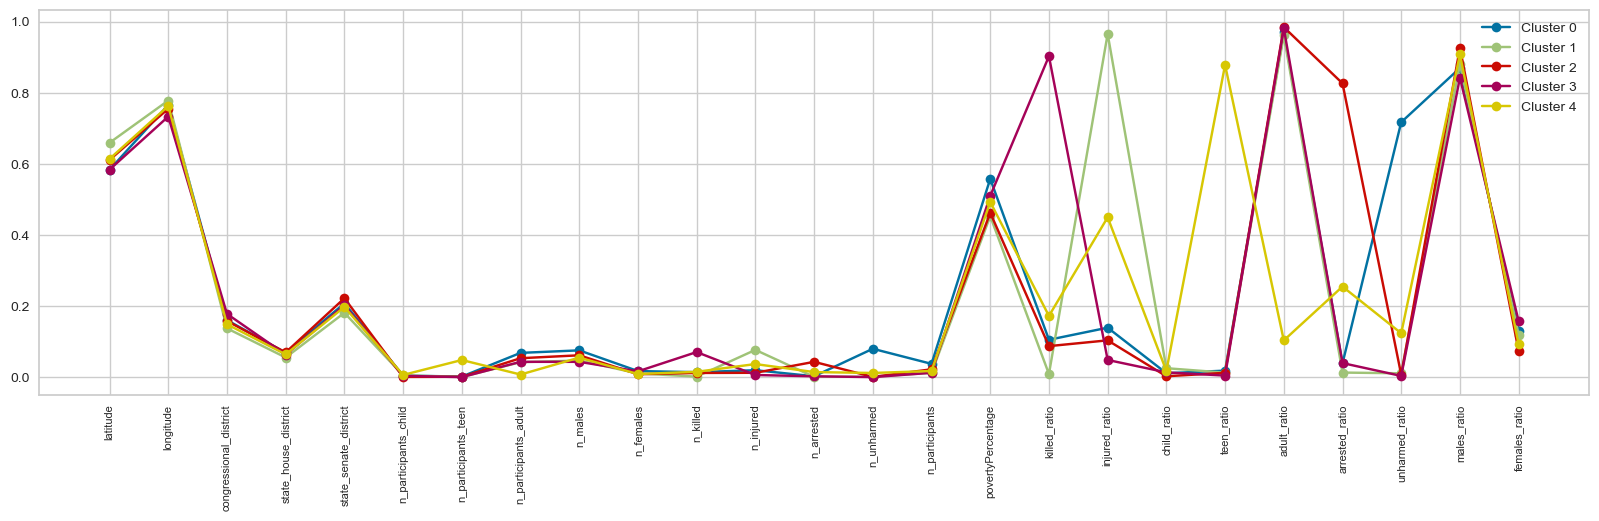

In [13]:
plt.figure(figsize=(20, 5))
for i in range(0, len(centroidi)):
    plt.plot(centroidi[i], marker='o', label='Cluster %s' % (i))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=8, rotation='vertical')
plt.legend(fontsize=10)
plt.show()

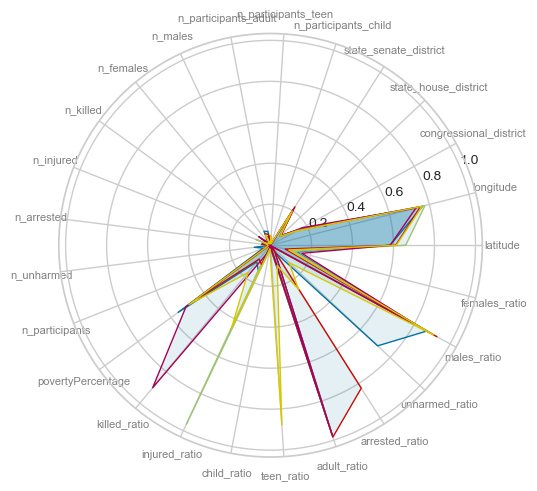

In [14]:

N = len(df.columns)
for i in range(0, len(centroidi)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centroidi[i].tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], df.columns, color='grey', size=8) 

    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)

In [15]:
model.labels_

array([1, 2, 3, ..., 1, 1, 2])

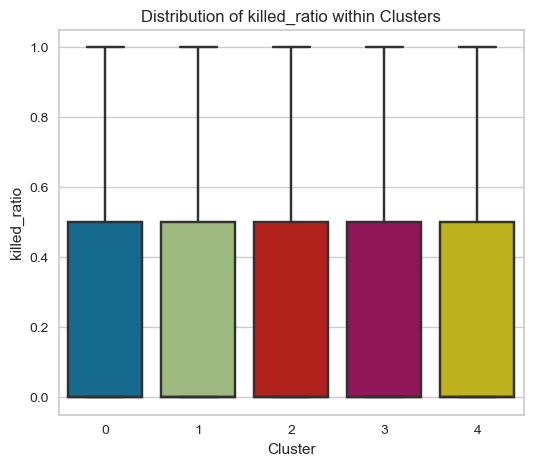

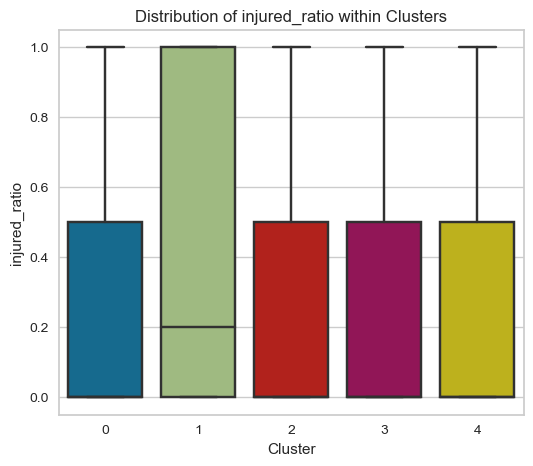

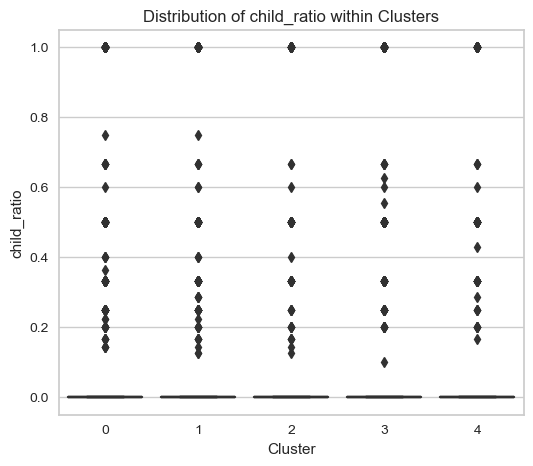

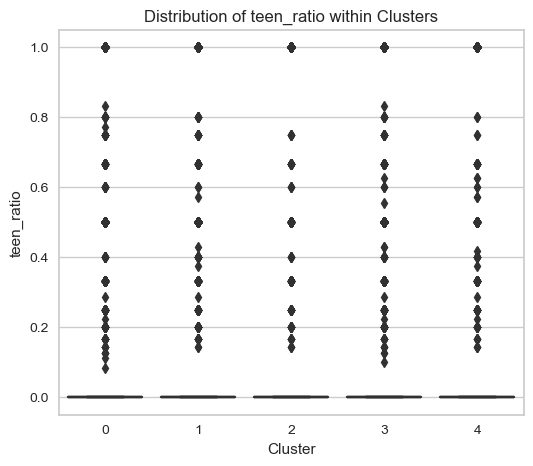

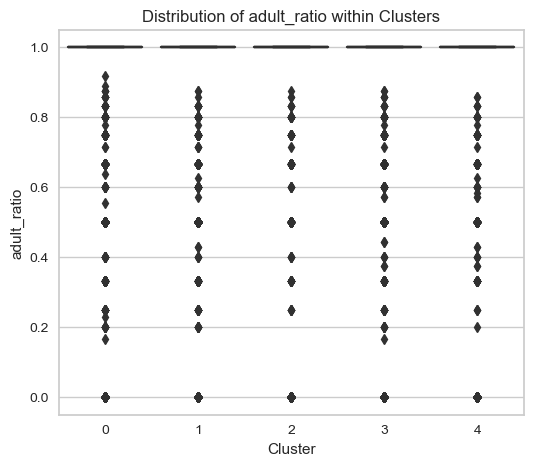

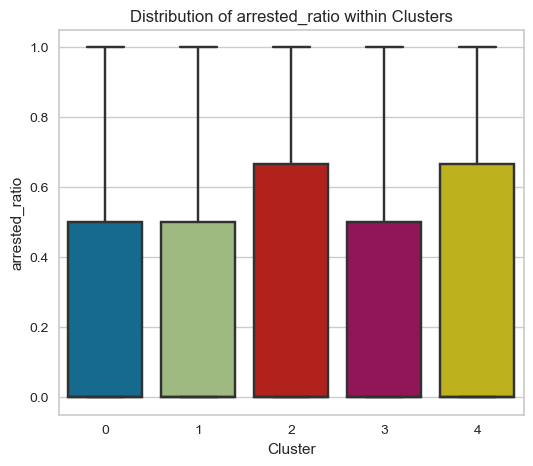

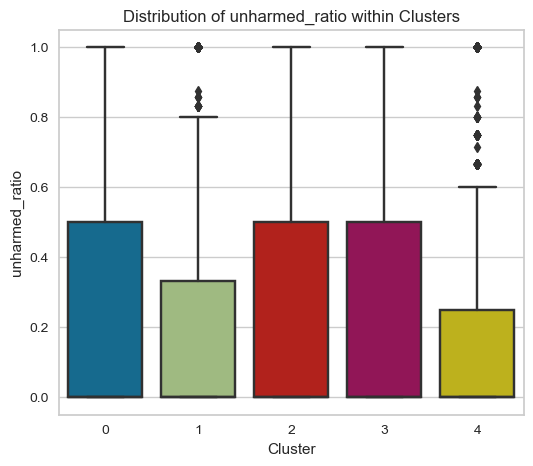

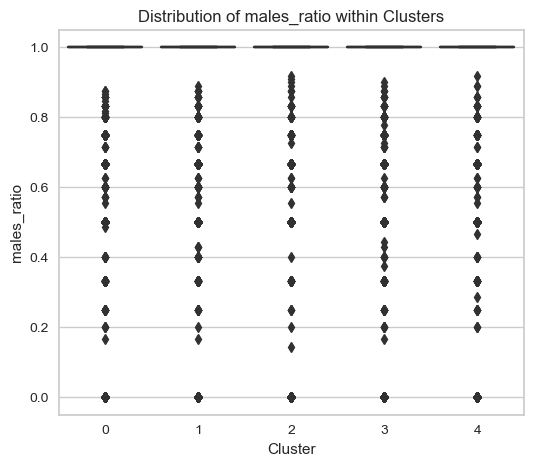

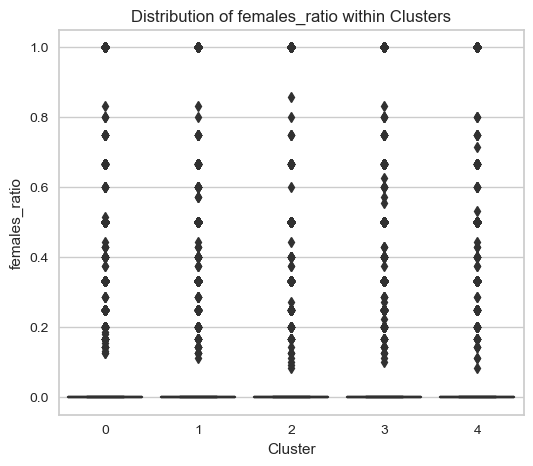

In [16]:
data = pd.DataFrame(df, columns=['killed_ratio', 'injured_ratio', 'child_ratio', 'teen_ratio', 'adult_ratio', 'arrested_ratio', 'unharmed_ratio', 'males_ratio', 'females_ratio'])
data['Cluster'] = model.fit_predict(df)

# Analyze the distribution of variables within clusters using boxplots
for variable in data.columns[:-1]: 
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='Cluster', y=variable, data=data)
    plt.title(f'Distribution of {variable} within Clusters')
    plt.show()

Scelgo k=6

In [17]:
model = KMeans(n_clusters=6, n_init=10, max_iter=100)
model.fit(norm_df)
centroidi = model.cluster_centers_
mean_distance = distance.cdist(centroidi, centroidi, 'euclidean').mean()
print(f"Distanza media tra i centroidi: {mean_distance}")

Distanza media tra i centroidi: 1.0641213779353764


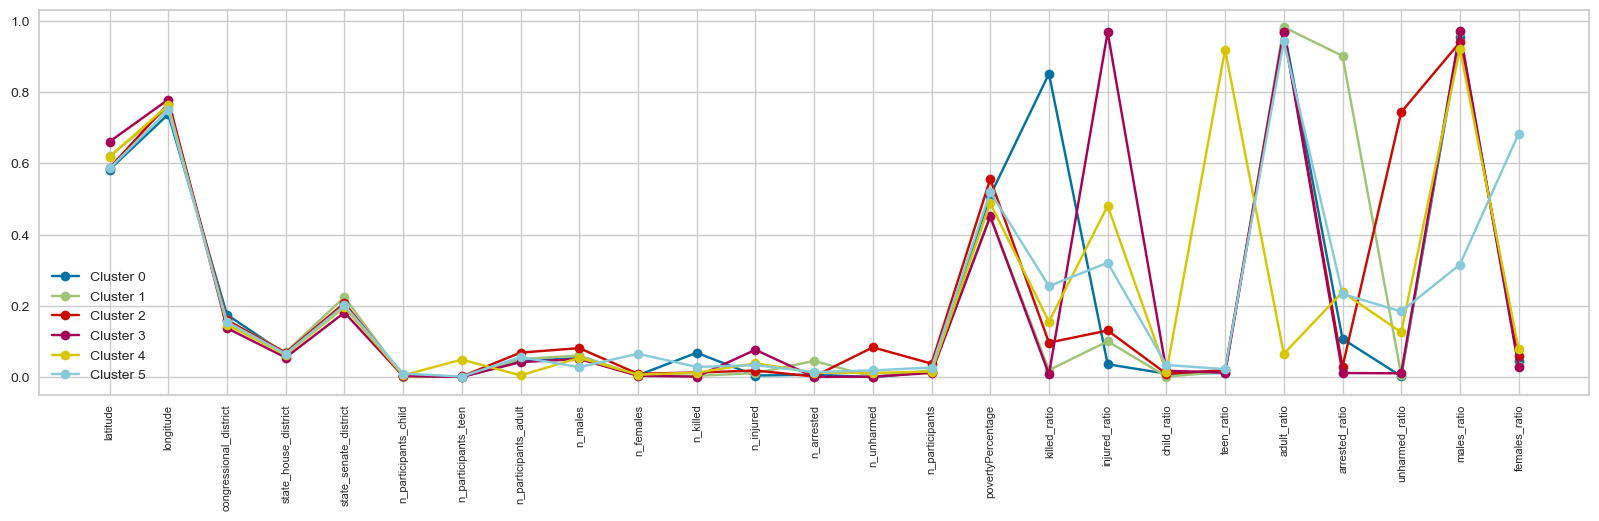

In [18]:
plt.figure(figsize=(20, 5))
for i in range(0, len(centroidi)):
    plt.plot(centroidi[i], marker='o', label='Cluster %s' % (i))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=8, rotation='vertical')
plt.legend(fontsize=10)
plt.show()

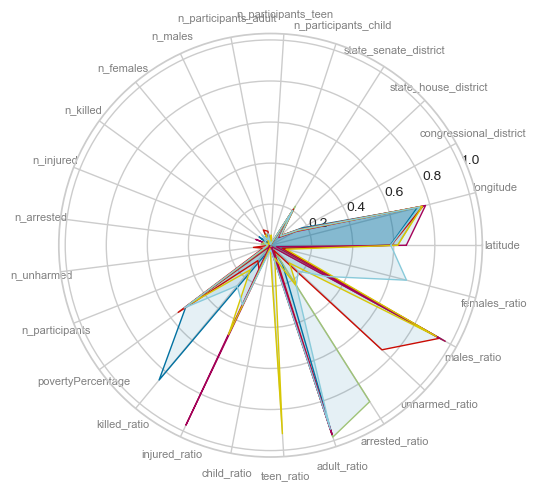

In [19]:
N = len(df.columns)
for i in range(0, len(centroidi)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centroidi[i].tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], df.columns, color='grey', size=8) 

    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)
	

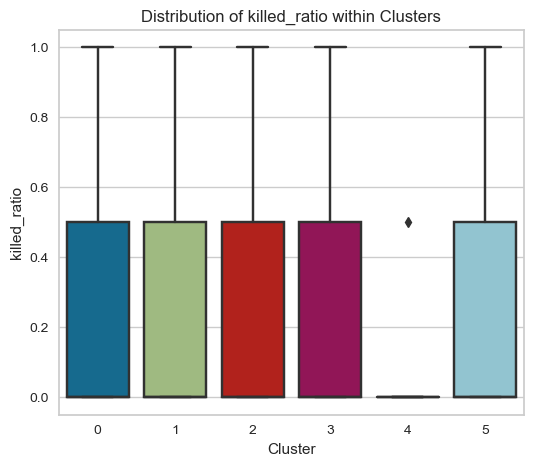

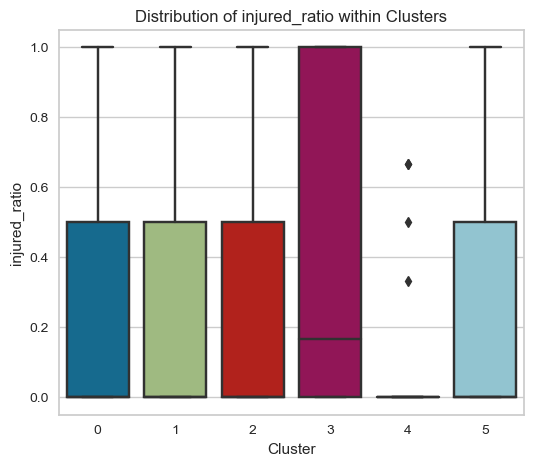

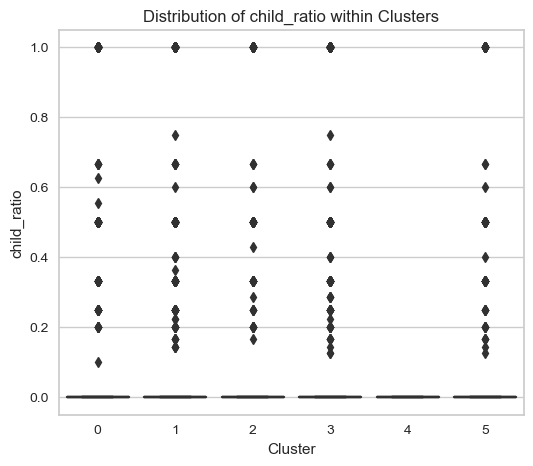

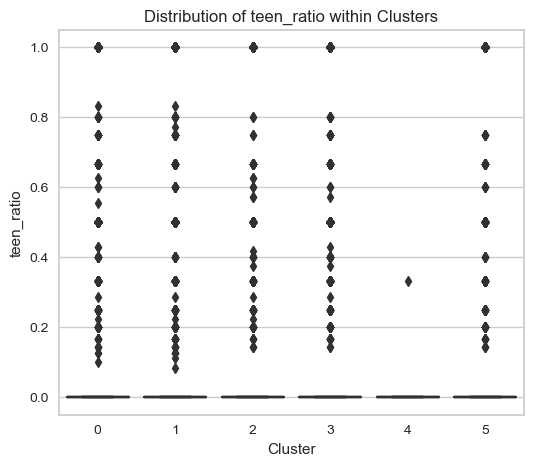

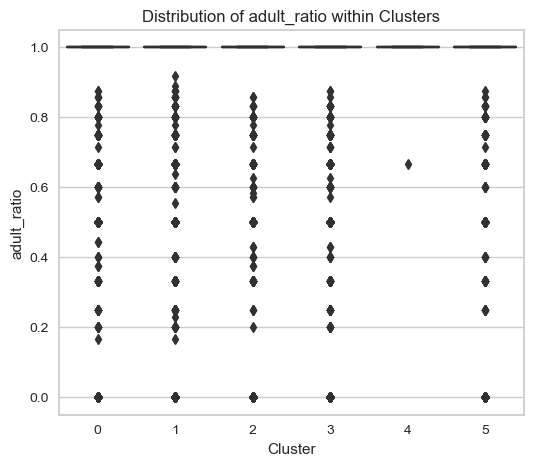

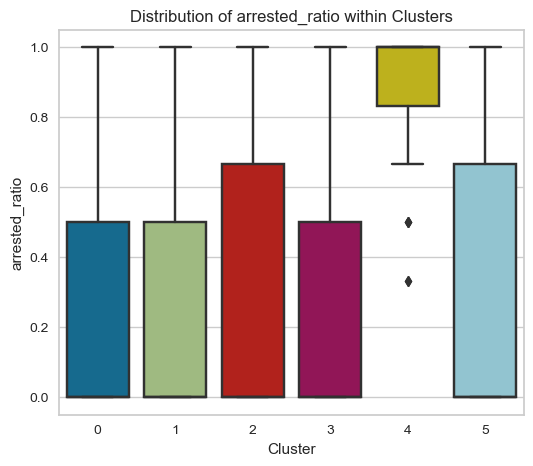

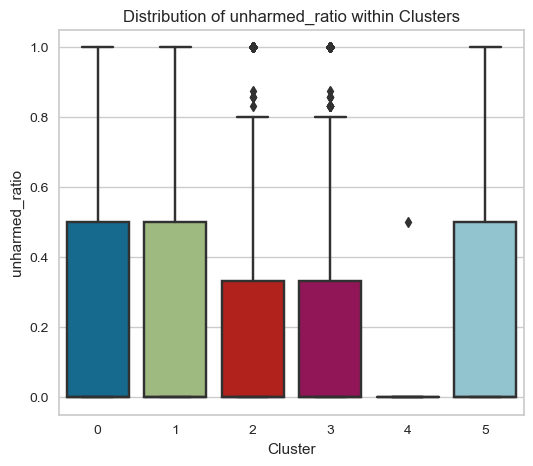

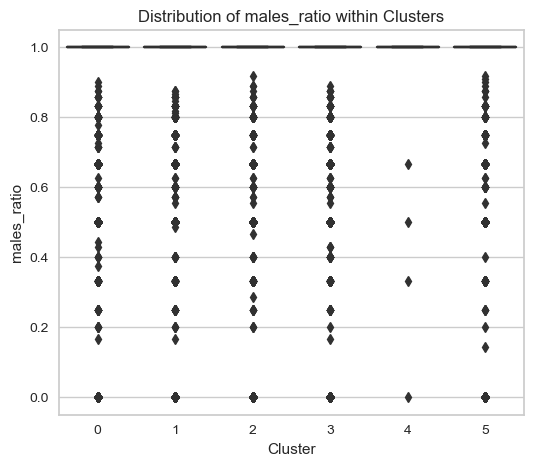

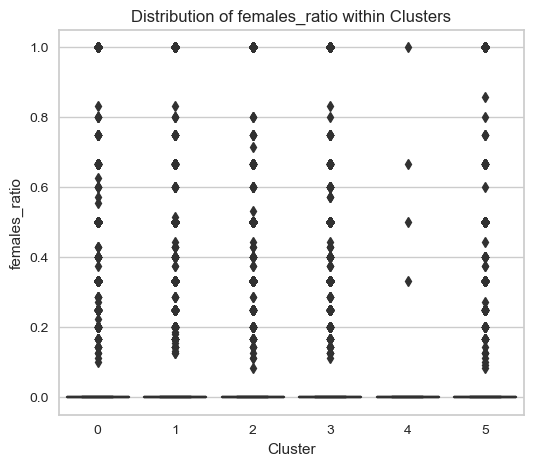

In [20]:
data = pd.DataFrame(df, columns=['killed_ratio', 'injured_ratio', 'child_ratio', 'teen_ratio', 'adult_ratio', 'arrested_ratio', 'unharmed_ratio', 'males_ratio', 'females_ratio'])
data['Cluster'] = model.fit_predict(df)

# Analyze the distribution of variables within clusters using boxplots
for variable in data.columns[:-1]: 
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='Cluster', y=variable, data=data)
    plt.title(f'Distribution of {variable} within Clusters')
    plt.show()